# Question

[0.65, 0.65, 0.7, 0.7, 0.6, 0.8, 0.7, 0.65, 0.55, 0.55, 0.4, 0.5, 0.5, 0.55, 0.6, 0.75, 0.75, 0.65, 0.55, 0.6, 0.6, 0.6, 0.6, 0.65, 0.55, 0.55, 0.55, 0.55, 0.5, 0.55, 0.45]


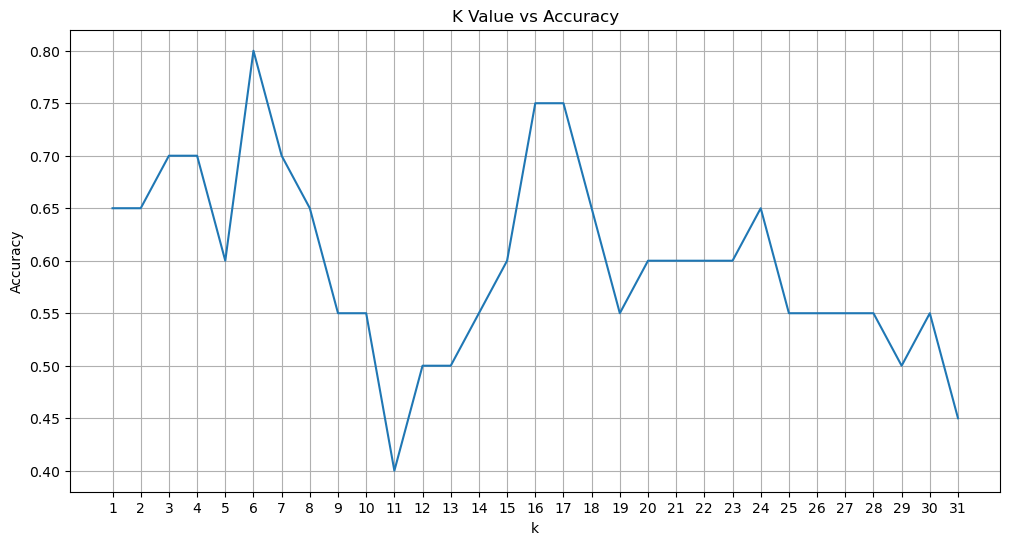

In [3]:
import pandas as pd 
har = pd.read_csv(r"C:\Users\DELL\Downloads\fitness_subscribe_knn (1).csv")

from sklearn.preprocessing import LabelEncoder
for col in ['Gender', 'Fitness_Level', 'Diet']:
    le = LabelEncoder()
    har[col] = le.fit_transform(har[col])

X = har.drop("Will_Subscribe", axis = 1)
y = har["Will_Subscribe"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 32) 
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
print(accuracies)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracies)
plt.title("K Value vs Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()
